# Introduction to Data Science
## Homework 3 Solutions

Student Name: Ashish Bansal

Student Netid: ab6995
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Classes).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [192]:
import pandas as pd
import numpy as np
import math
df = pd.read_csv("/Users/ashishbansal/Downloads/Cell2Cell_data.csv")
randomized_Data = df.reindex(np.random.permutation(df.index))
train_df = randomized_Data[:int((len(randomized_Data)+1)*.80)]
test_df = randomized_Data[int((len(randomized_Data)+1)*.80):]




2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

<p>
<span style = "color: blue">By finding the probability of our data we can prove to ourselves or a colleague that our data was indeed randomly sampled on X(which is our attributes).In this case, I would find the probability by taking churndep as the variable which is in binary (0&1), and comparing it to the probability of the whole population. Then we have to check the difference between both the probabilites (of the sample and the whole population) and if it's in the accepted error range, then the data is sapmpled randomly.
</span>
</p>

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
dt = DecisionTreeClassifier(criterion="entropy")
names = ["revenue", "outcalls", "incalls", "months", "eqpdays", "webcap", "marryyes", "travel", "pcown", "creditcd", "retcalls", "churndep"]
df.names = names
y = train_df[df.names[11]]
X = train_df[df.names[0:11]]
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

([<matplotlib.axis.XTick at 0x11cedca58>,
 <a list of 11 Text xticklabel objects>)

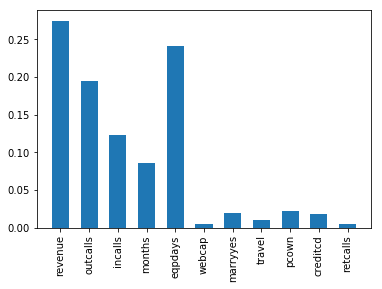

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

importance = dt.feature_importances_
a = range(1,len(importance)+1)
plt.bar(a, importance, width=0.6)
plt.xticks(a, names[0:11], rotation="vertical")

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

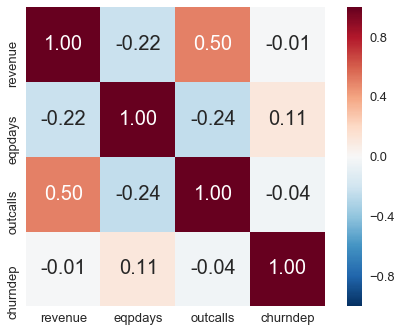

In [195]:
#Three most important features from above plot are 'revenue', 'eqpdays', 'outcalls' respectively
import seaborn as sns
columns = ['revenue', 'eqpdays', 'outcalls', 'churndep']
cm = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.3)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 20},
            yticklabels=columns,
            xticklabels=columns)
plt.show()

<p>
<span style = "color: blue">I plotted a correlation matrix whether these features are positively or negatively related. From the matrix, we can say that features 'revenue' and 'eqpdays' have negative relation (-0.22), features 'revenue' and 'outcalls' have positive relation (0.50) and features 'eqpdays' and 'outcalls' have negative relation (-0.24).
Now relating each of the above feature with our target variable, we can say that more the number of outcalls the user makes, the more revenue is generated by the company and it is less likely that the customer will churn, as if the customer is not satisfied with the company's services he/she will not use the service extensively. The older the equipment, the more likely it is that the customer will churn. One of the reasons which I see is that the older the equipment, more problems it has, which makes the user churn.
</span>
</p>

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [196]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
y_test = test_df[df.names[11]]
X_test = test_df[df.names[0:11]]
from sklearn.cross_validation import cross_val_score
test_accuracy = cross_val_score(dt, X_test, y_test, cv=5, scoring = "accuracy").mean()
test_accuracy

0.5299268887289863

In [197]:
prediction = dt.predict(X)
y_train_list = y.tolist()
count = 0
for i in range(len(X)):
    if prediction[i] == y_train_list[i]:
        count = count + 1
train_accuracy = count/len(X)
print("Train Data Accuracy:",train_accuracy)

y_test = test_df[df.names[11]]
X_test = test_df[df.names[0:11]]

prediction = dt.predict(X_test)
y_test_list = y_test.tolist()
count = 0
for i in range(len(X_test)):
    if prediction[i] == y_test_list[i]:
        count = count + 1
test_accuracy = count/len(X_test)
print("Test Data Accuracy:",test_accuracy)

Train Data Accuracy: 0.9998432012042148
Test Data Accuracy: 0.5217664032116422


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [198]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
df = pd.read_csv("/Users/ashishbansal/Downloads/Cell2Cell_data.csv",header = 0)
train_df=df.sample(frac=0.8,random_state=50)
test_df=df.drop(train_df.index)

Xdt_train=train_df.iloc[:,0:10]
Ydt_train=train_df['churndep']                 
Xdt_test=test_df.iloc[:,0:10]
Ydt_test=test_df['churndep']

In [225]:
#Place your code here
split_values = [5, 10, 50, 100, 150, 200, 300, 600, 800, 3000]
leaf_values = [5, 10, 20, 40, 50, 100, 130, 200, 400, 1000]

2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

<p>
<span style = "color: blue">
I have choosen these values as i want to cover a wide range of random values which can show me the behaviour of decision trees and how the models accuracy changes with the change in the values of min_samples_split & min_samples_leaf and by these values we can infer the best possible combination and I could repeat the same process with another set of values but more narrower in range to the above obtained values to get the most accurate tree.
</span>
</p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

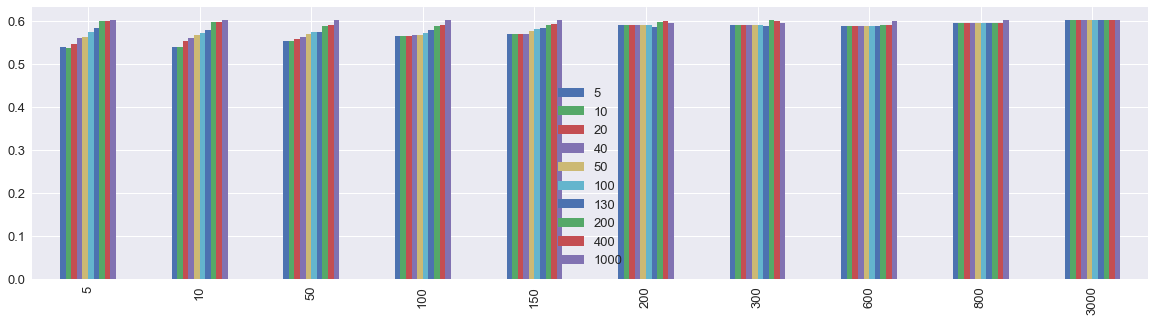

In [226]:
#Place your code here
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import *

result = []
a = 0
c=0
df = pd.DataFrame(result, columns=leaf_values, index = split_values)
for i in leaf_values:
    b = 0
    for j in split_values:
        newdt = DecisionTreeClassifier(criterion="entropy", min_samples_leaf = i, min_samples_split = j)
        newdt = newdt.fit(Xdt_train,Ydt_train)
        
        prediction = newdt.predict(Xdt_test)
        c = accuracy_score(Ydt_test, prediction)
        df.iloc[a:a+1, b:b+1] = c
        b=b+1
    a=a+1
#df    
df.plot.bar(figsize=(20,5))                
                

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

In [227]:
print("Best accuracy is:",max(df.max()))
print("min_leaf_size:",df.max(axis=0).idxmax())
print("min_split_size:",df.max(axis=1).idxmax())
# This is accuracy we are getting for the best minimum leaf size corresponding to the best minimum split size.

Best accuracy is: 0.602734570998
min_leaf_size: 1000
min_split_size: 5


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style = "color: blue">
I would use the churn prediction model to find the areas where the company lags behind from it's competitors, by  results we can find most important features that are responsible for customers churning. These results can be presented to the board and they can put in the company resources in making these areas(features we get) better, so that the customer churn rate falls and comapany gets better. Churn prediction model is beneficial as it helps us direct the resources in the areas where it is needed the most. Imagine a company, which doesn't have a churn prediction model, most of it resources would be put in areas on the assumption that they lead to customer churning. Churn Prediction Model makes us understand the needs of our customers better and in turn increasing the revenue of the company.
</span>
</p>


### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file cases.csv is available on NYU Classes.



1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [103]:

import pandas as pd
import numpy as np
from pandas import Series
import datetime
from dateutil.relativedelta import relativedelta
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


series = pd.read_csv('/Users/ashishbansal/Downloads/cases.csv', index_col=0)
start = datetime.datetime.strptime("1700-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(years=x) for x in range(0,309)]
series['index'] =date_list
series.set_index(['index'], inplace=True)
series.index.name=None
series
#series = pd.read_csv('/Users/ashishbansal/Downloads/cases.csv',header =0)
#series.YEAR = pd.to_datetime(series.YEAR)
#series.head()


,YFCASES
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0
1705-01-01,58.0
1706-01-01,29.0
1707-01-01,20.0
1708-01-01,10.0
1709-01-01,8.0


2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

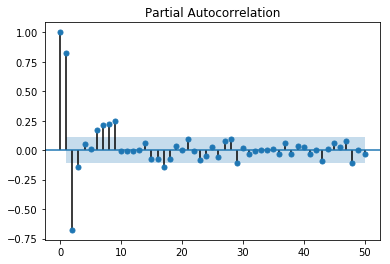

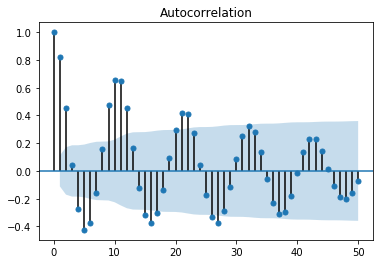

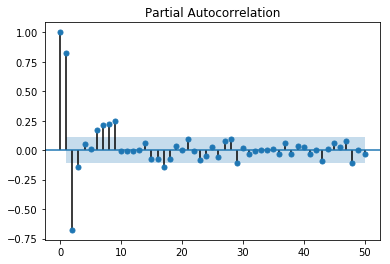

In [104]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series.YFCASES, lags= 50)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series.YFCASES, lags= 50)

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


<p>
<span style = "color: blue">
as we can see from the above plots RULE 2 fits in according to the rules so we will choose our model to be (2,0)
</span>
</p>

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [136]:
#Place your code here
from statsmodels.regression.linear_model import OLS
import numpy as np
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
sm.stats.durbin_watson(series.YFCASES)

0.13952892659903304

5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


In [137]:
#Place your code here
#series1 = pd.read_csv('/Users/ashishbansal/Downloads/cases.csv',header =0)
#series1.YEAR = pd.to_datetime(series1.YEAR)
#series1.set_index('YEAR', inplace = True)
model= sm.tsa.ARMA(series.YFCASES, (2,0)).fit()
print(model.params) 

const            49.659343
ar.L1.YFCASES     1.390656
ar.L2.YFCASES    -0.688571
dtype: float64


6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



In [164]:
#Place your code here
from statsmodels.graphics.api import qqplot
import scipy.stats as stats

residuals = model.resid
stats.normaltest(residuals)


NormaltestResult(statistic=41.736017448911511, pvalue=8.6524472974138723e-10)

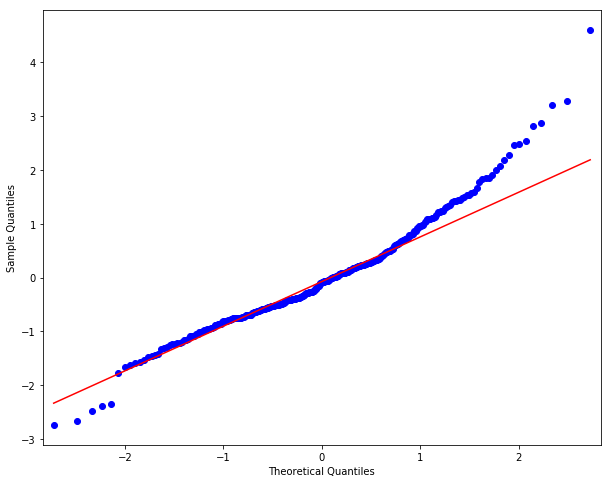

In [165]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
fig = qqplot(residuals, line='q', ax=ax, fit=True)

<p>
<span style="color:blue">
as we can see residual points are plotted in a Q–Q plot are always in a non-decreasing when viewed from left to right. If the two distributions being compared are identical, the Q–Q plot follows the 45° line y = x. which in this case is almost true and getting deviate later,  even then they are in a increasing fashion. 
</span>
</p>


7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


In [156]:
#Credits: This code has been written with the help of online source "time-series-analysis-using-ipython/"
r,q,p = sm.tsa.acf(residuals.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag')) 

            AC          Q  Prob(>Q)
lag                                
1.0  -0.085220   2.265963  0.132244
2.0   0.103691   5.631595  0.059857
3.0  -0.027833   5.874879  0.117859
4.0   0.091122   8.491075  0.075158
5.0   0.019010   8.605309  0.125881
6.0   0.031321   8.916433  0.178333
7.0   0.044485   9.546129  0.215785
8.0  -0.034337   9.922561  0.270503
9.0   0.185690  20.967736  0.012794
10.0  0.191608  32.767496  0.000298
11.0  0.190385  44.456241  0.000006
12.0  0.121693  49.247974  0.000002
13.0 -0.016219  49.333376  0.000004
14.0  0.014986  49.406538  0.000008
15.0 -0.063197  50.711986  0.000009
16.0  0.039730  51.229699  0.000015
17.0  0.009577  51.259882  0.000027
18.0 -0.073645  53.050943  0.000026
19.0  0.076469  54.988676  0.000023
20.0 -0.006827  55.004174  0.000041
21.0  0.088818  57.636439  0.000029
22.0  0.120485  62.497151  0.000009
23.0  0.103328  66.084660  0.000005
24.0 -0.085728  68.562776  0.000004
25.0  0.013730  68.626565  0.000006
26.0 -0.036183  69.071136  0

<p>
<span style = "color: blue">as we can see that prob(>Q) of first 8 lags are maximum and then drops dramatically which tell us that these lags have higher impact as compared to other higher lags.
</span>
</p>

8\. Compute prediction for years 2009-2012 and analyze their fit against actual values. (1 point)



In [157]:
predict1 = model.predict('2009','2012')
predict1

2009-01-01    13.662904
2010-01-01    31.797825
2011-01-01    49.606231
2012-01-01    61.884409
Freq: AS-JAN, dtype: float64

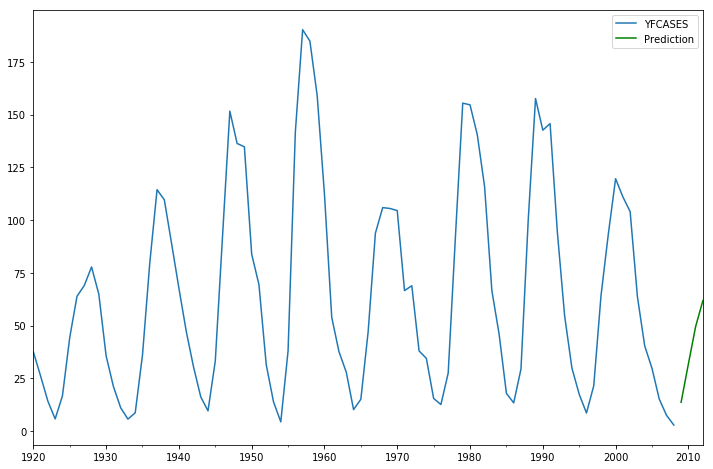

In [158]:
ax = series.ix['1920':].plot(figsize=(12,8))
ax = predict1.plot(ax=ax, style='g', label='Prediction')
ax.legend()

<p>
<span style = "color: blue">
The above graph is the fit of predicted values for year 2009 to 2012 and actual data set. This fit shows us that our prediction from the model follows the actual data pattern.
</span>
</p>

In [213]:
def mfe(y, y_pred):
    return y.sub(y_pred).mean()

In [214]:
def mbe(y,y_pred):
    return np.mean((np.abs(y.sub(y_pred).mean()) / y_pred))


In [215]:
def mse(y, y_pred):
    i=0
    for i in range (len(y)):
        i+=1
        mse = np.mean((y - y_pred) ** 2)  
        return mse

In [216]:
print ("MFE = ", mfe(series.YFCASES, predict1))
print ("MAE = ", mbe(series.YFCASES, predict1))
print ("MSE = ", mse(series.YFCASES, predict1))

MFE =  nan
MAE =  nan
MSE =  nan


<p>
<span style = "color: blue">While finding mfe and mae for the predictions for year 2009 & 2012 we are getting it to be nan as we dont have actual vales for them in our data set.
</span>
</p>

# Trying to predict for year 1700 to 2008 to see the correctness of model

In [217]:
predict = model.predict('1700-01-01 00:00:00','2008')
predict

1700-01-01     49.659343
1701-01-01     12.879270
1702-01-01     26.648643
1703-01-01     29.470495
1704-01-01     35.762229
1705-01-01     49.020755
1706-01-01     70.663755
1707-01-01     15.186174
1708-01-01     22.638836
1709-01-01     14.929420
1710-01-01     19.033820
1711-01-01     13.457684
1712-01-01     12.728573
1713-01-01     14.794286
1714-01-01     17.575597
1715-01-01     28.714357
1716-01-01     44.767707
1717-01-01     61.563683
1718-01-01     70.042751
1719-01-01     54.853645
1720-01-01     27.715589
1721-01-01     26.878370
1722-01-01     31.671342
1723-01-01     27.485861
1724-01-01     14.942933
1725-01-01     36.423773
1726-01-01     55.960520
1727-01-01     95.722585
1728-01-01    130.745732
1729-01-01     74.026141
                 ...    
1979-01-01    124.494232
1980-01-01    167.209350
1981-01-01    122.785699
1982-01-01    103.589245
1983-01-01     79.295891
1984-01-01     27.606558
1985-01-01     32.766543
1986-01-01      8.081606
1987-01-01     21.103649


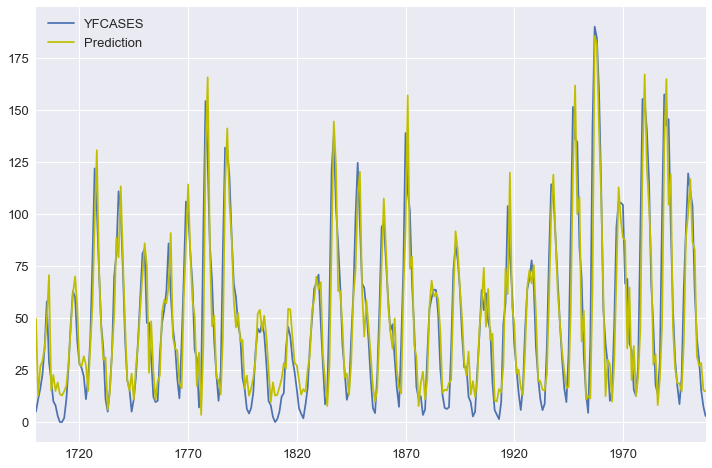

In [234]:
ax = series.ix['1700':].plot(figsize=(12,8))
ax = predict.plot(ax=ax, style='y', label='Prediction')
ax.legend()

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [235]:
#FUNCTIONS ARE DEFINED ABOVE.
print ("MFE = ", mfe(series.YFCASES, predict))
print ("MAE = ", mbe(series.YFCASES, predict))
print ("MSE = ", mse(series.YFCASES, predict))

MFE =  -0.06662094329020164
MAE =  0.0023413949429254262
MSE =  280.1282921766729
